In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

<Axes: ylabel='Count'>

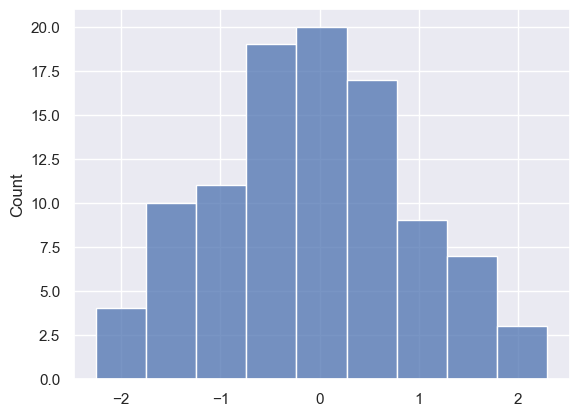

In [5]:
x = np.random.normal(size=100)
sns.histplot(x, kde=False)

<Axes: ylabel='Count'>

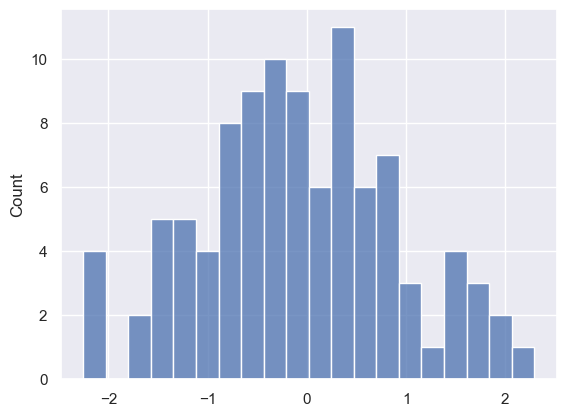

In [7]:
sns.histplot(x, bins=20, kde=False)

### 数据分布情况  ###

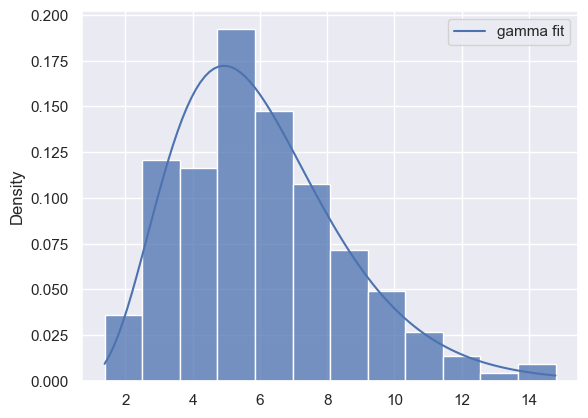

In [26]:
# 生成200个服从Gamma分布的随机数
x = np.random.gamma(6, size=200)

# 绘制直方图，统计密度
sns.histplot(x, kde=False, stat="density")

# 拟合Gamma分布参数
gamma_params = stats.gamma.fit(x)

# 生成用于绘制拟合曲线的x值
x_vals = np.linspace(min(x), max(x), 100)

# 绘制Gamma分布的概率密度函数
plt.plot(x_vals, stats.gamma.pdf(x_vals, *gamma_params), label='gamma fit')

# 显示图例
plt.legend()

根据均值和协方差生成数据

In [29]:
# 定义均值和协方差矩阵
mean, cov = [0, 1], [(1, .5), (.5, 1)]

# 生成200个服从多元正态分布的随机数
data = np.random.multivariate_normal(mean, cov, 200)

# 将生成的数据转换为DataFrame，并命名列为"x"和"y"
df = pd.DataFrame(data, columns=["x", "y"])

# 显示DataFrame
df

,x,y
0,-0.205153,0.864204
1,-0.533221,-0.489551
2,-1.239141,0.766392
3,-0.571886,0.360136
4,1.367908,1.644919
...,...,...
195,1.123911,1.764009
196,0.449249,1.698504
197,-0.901442,0.803076
198,-0.216300,1.024778


###  观测两个变量之间的分布关系最好用散点图 ###

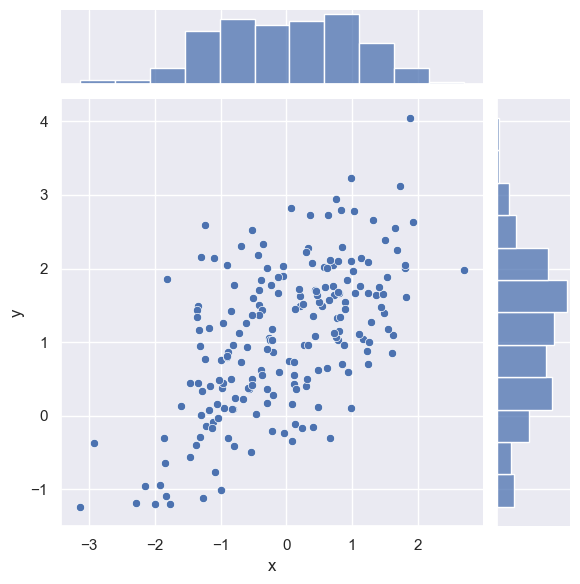

In [30]:
sns.jointplot(x="x", y="y", data=df);

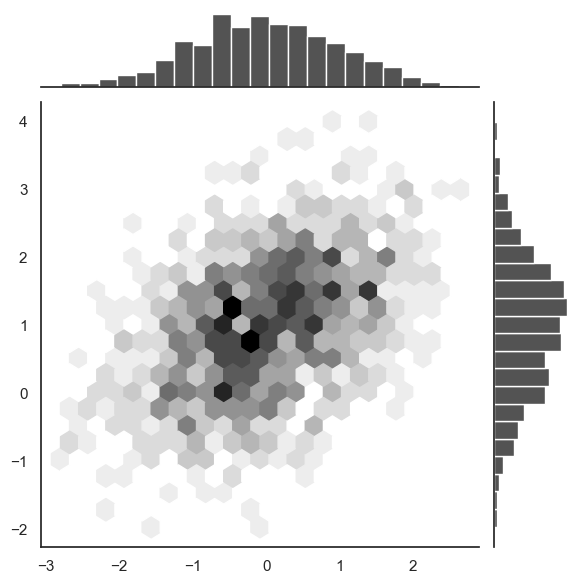

In [33]:
# 从多元正态分布中生成1000个随机数，并将其转置
x, y = np.random.multivariate_normal(mean, cov, 1000).T

# 使用Seaborn的白色主题样式
with sns.axes_style("white"):
    # 绘制六边形箱图
    sns.jointplot(x=x, y=y, kind="hex", color="k")

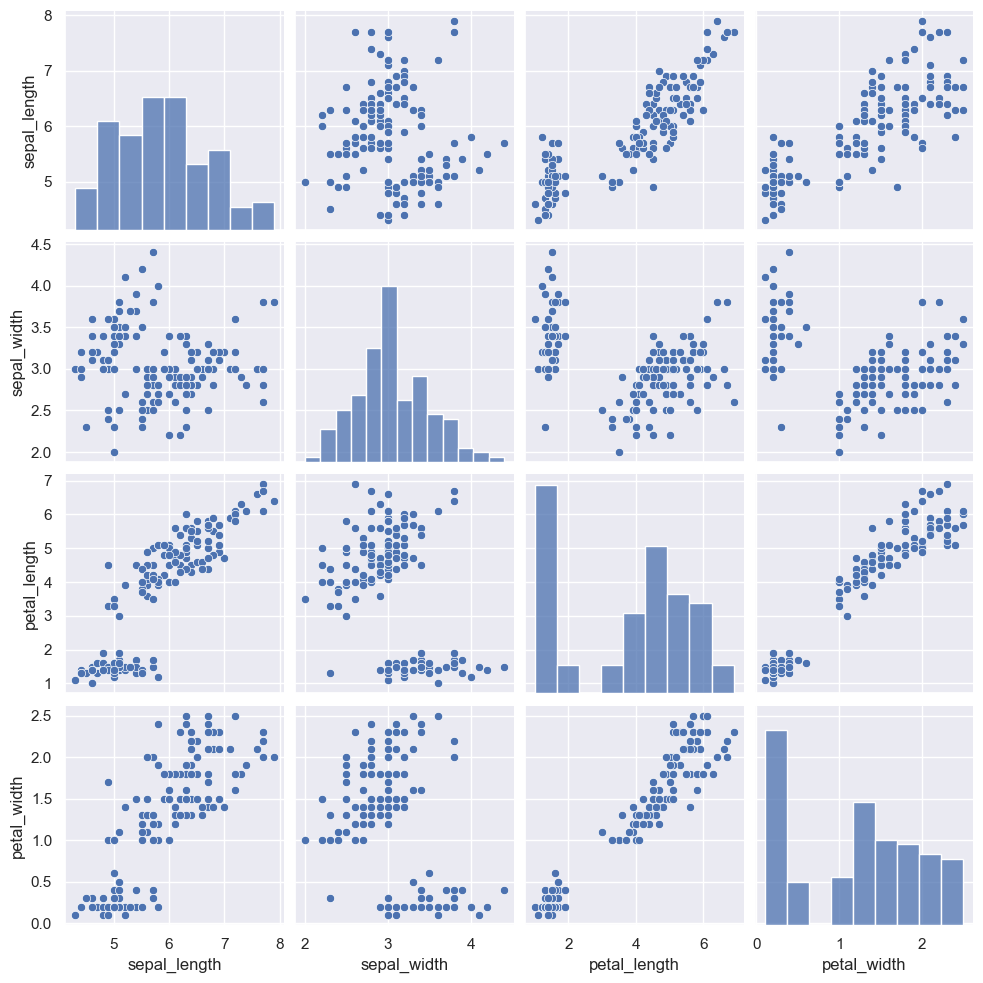

In [32]:
# 加载鸢尾花数据集
iris = sns.load_dataset("iris")

# 绘制成对关系图
sns.pairplot(iris)